In [119]:
# sklearn에서 제공하는 iris 데이터셋 로드

from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data

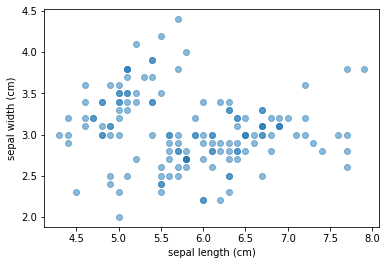

In [120]:
# 데이터셋 중 sepal length(x축), sepal width(y축) feature 사용

from matplotlib import pyplot as plt
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

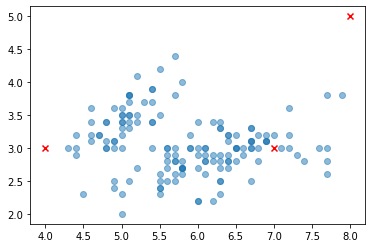

In [121]:
from random import *

k = 3

# 랜덤으로 x, y 좌표 3개를 생성합니다
# np.random.uniform은 주어진 최소, 최대값 사이에서 k 개 만큼 실수 난수를 생성합니다.
centroids_x = []
centroids_y = []

for i in range(k):
    cx=randint(4,8)
    cy=randint(2,5)

    centroids_x.append(cx)
    centroids_y.append(cy)

plt.scatter(x, y, alpha=0.5)	# 데이터들은 파란색으로 표시되고
plt.scatter(centroids_x, centroids_y,c='red',marker='x')	# centroids는 주황색으로 표시됩니다
plt.show()

In [122]:
n=len(samples)

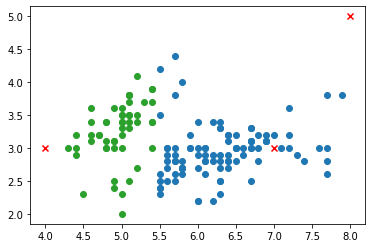

In [123]:
# 각 데이터를 k개의 중심 값 중 가장 가까운 중심값의 클러스터로 묶음
cluster=[[[],[]] for i in range(0,k)]

for i in range(n):
    cluster_k=-1
    min_d=float("inf")

    for c in range(k):
        dist=abs(x[i]-centroids_x[c])**2+abs(y[i]-centroids_y[c])**2

        if min_d>dist:
            min_d=dist
            cluster_k=c

    cluster[cluster_k][0].append(x[i])
    cluster[cluster_k][1].append(y[i])

color=['#1f77b4','#ff7f0e', '#2ca02c', '#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','1fbecf']
for c in range(k):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(centroids_x,centroids_y,c='red',marker='x')
plt.show()

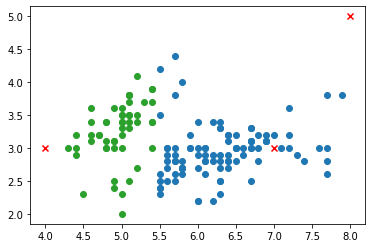

In [124]:
for c in range(cluster_k):
    centroids_x[c]=sum(cluster[c][0])//len(cluster[c][0])
    centroids_y[c]=sum(cluster[c][1])//len(cluster[c][1])

for c in range(k):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(centroids_x,centroids_y,c='red',marker='x')
plt.show()

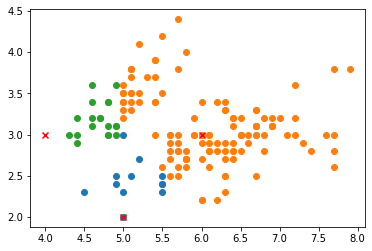

In [126]:
while True:
    move=0

    cluster=[[[],[]] for i in range(0,k)]

    for i in range(n):
        cluster_k=-1
        min_d=float("inf")

        for c in range(k):
            dist=abs(x[i]-centroids_x[c])**2+abs(y[i]-centroids_y[c])**2

            if min_d>dist:
                min_d=dist
                cluster_k=c

        cluster[cluster_k][0].append(x[i])
        cluster[cluster_k][1].append(y[i])

    for c in range(k):
        ncentroids_x=sum(cluster[c][0])//len(cluster[c][0])
        ncentroids_y=sum(cluster[c][1])//len(cluster[c][1])

        if ncentroids_x!=centroids_x[c] or ncentroids_y!=centroids_y[c]:
            move=1
            centroids_x[c]=ncentroids_x
            centroids_y[c]=ncentroids_y

    if move==0:   # 중심값의 이동이 없을 때 중단
        break

for c in range(k):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(centroids_x,centroids_y,c='red',marker='x')
plt.show()